Data Load

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.classifier import ConfusionMatrix
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=4, shuffle = True, random_state=62)

from sklearn.metrics import recall_score



from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("star_classification.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Since the target variable, i.e., the 'class' column is of non-numeric type, we'll have to perform encoding.

In [ ]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

In [ ]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

len(outlier_index)

15256

In [ ]:
df.drop(outlier_index, inplace=True)

In [ ]:
df.shape

(84744, 18)

Data visualization

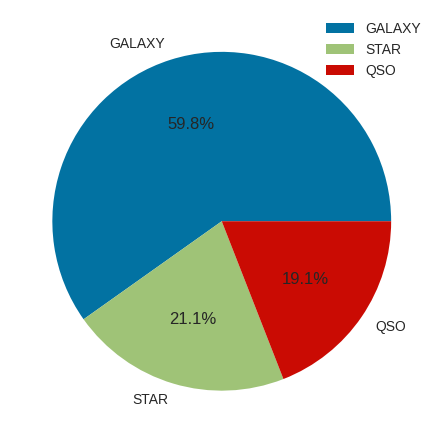

In [ ]:
#proportion of different elements of the class
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

In [ ]:
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
df["class"] = df["class"].astype(int)

In [ ]:
def plot(column):
    for i in range(3):
        sns.kdeplot(data=df[df["class"] == i][column], label = le.inverse_transform([i]))
    sns.kdeplot(data=df[column],label = ["All"])
    plt.legend();

In [ ]:
def log_plot(column):
    for i in range(3):
        sns.kdeplot(data=np.log(df[df["class"] == i][column]), label = le.inverse_transform([i]))
    sns.kdeplot(data=np.log(df[column]),label = ["All"])
    plt.legend();

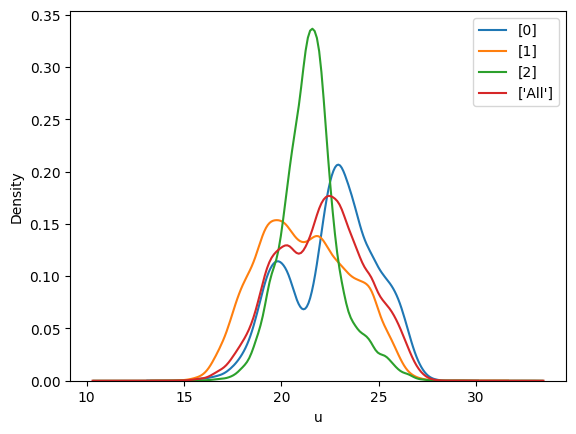

In [ ]:
plot("u")

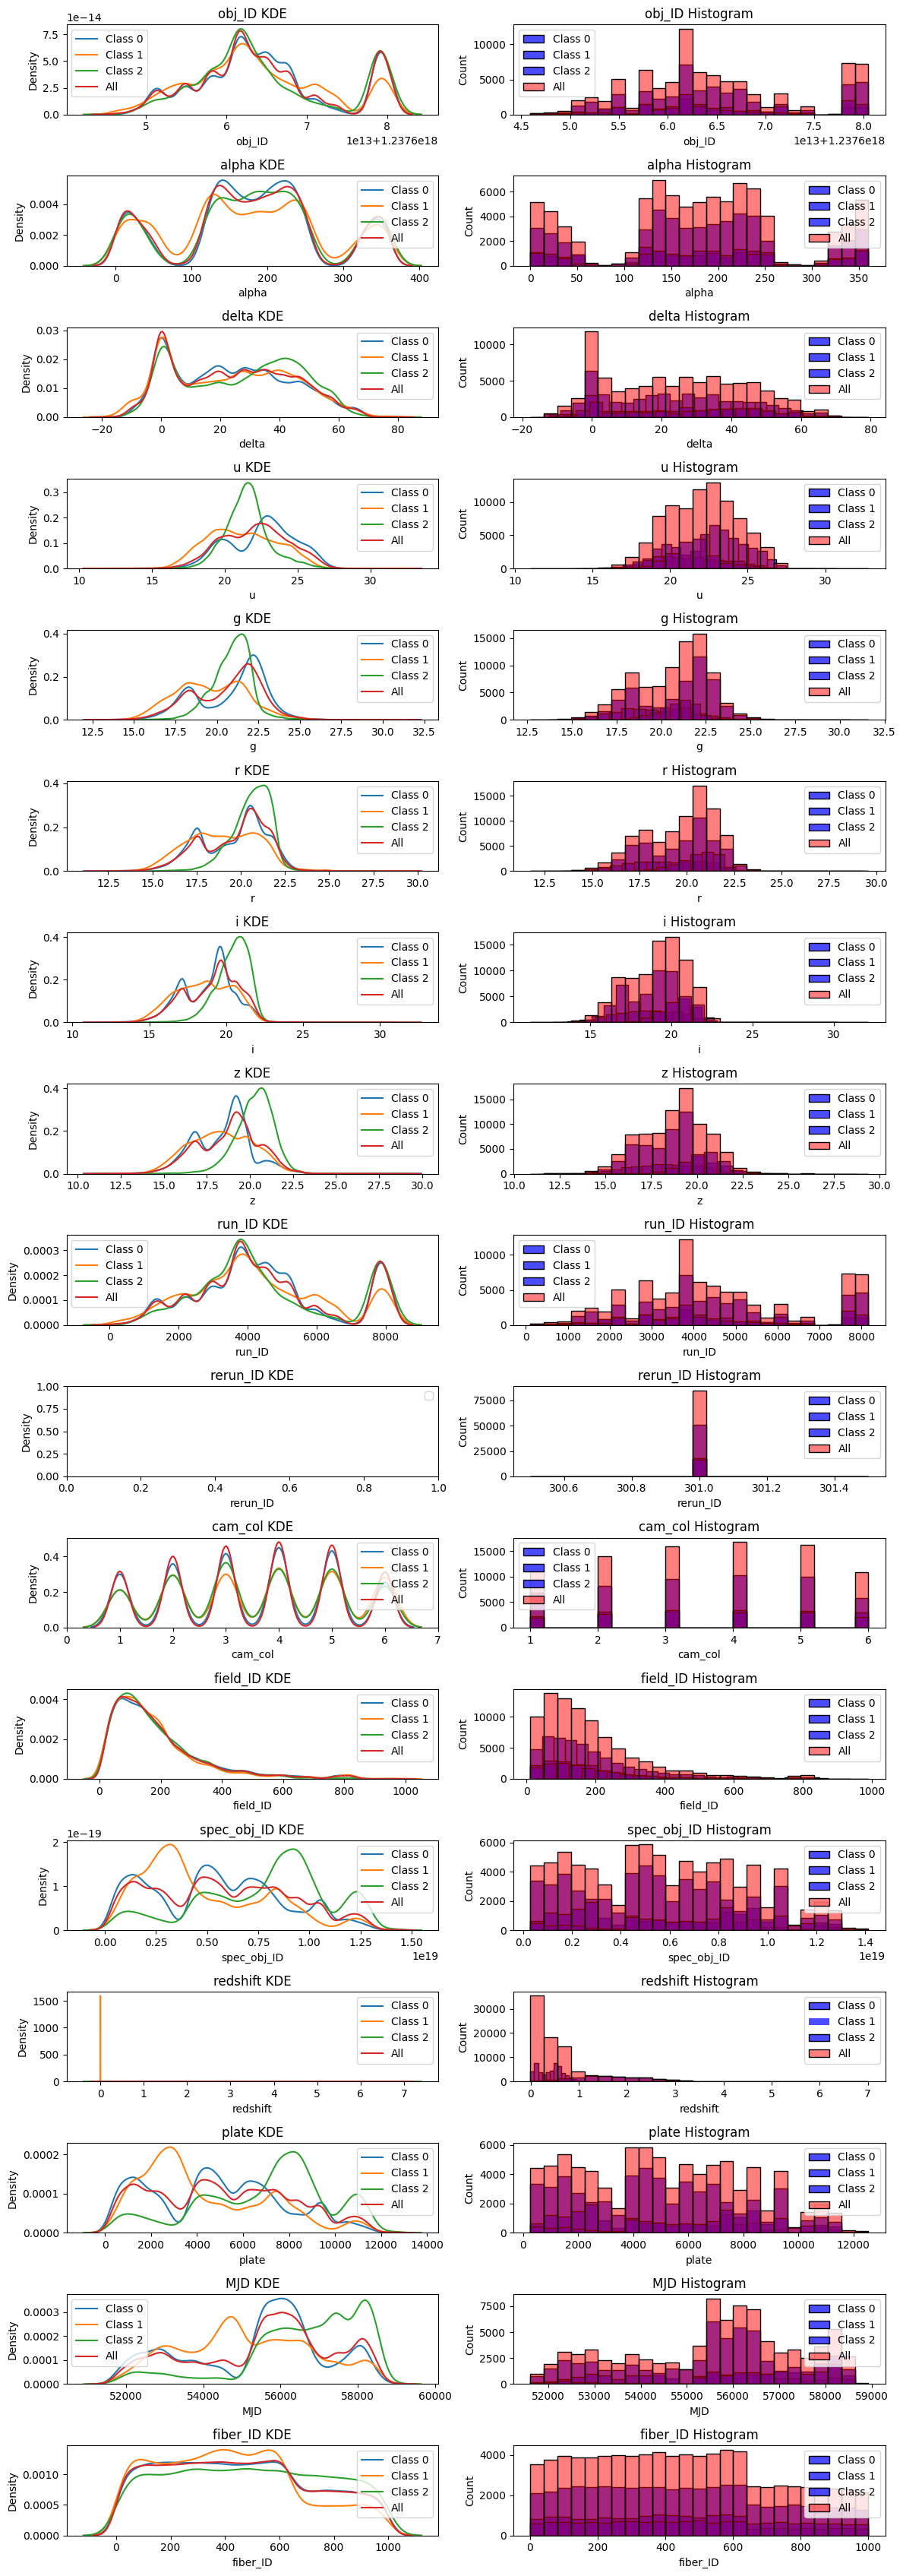

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supongamos que tienes un DataFrame llamado "df" y has definido las funciones "plot" y "log_plot" como mencionaste

# Selecciona las características que deseas visualizar en los gráficos
features = df.drop('class', axis=1)

# Crea una matriz de subgráficos
fig, axes = plt.subplots(nrows=len(features.columns), ncols=2, figsize=(12, 2*len(features.columns)))
fig.subplots_adjust(hspace=0.5)

# Itera a través de las características y genera gráficos
for i, col in enumerate(features.columns):
    # Gráfico KDE
    ax1 = axes[i, 0]
    for j in range(3):
        sns.kdeplot(data=df[df["class"] == j][col], label=f'Class {j}', ax=ax1)
    sns.kdeplot(data=df[col], label="All", ax=ax1)
    ax1.set_title(f'{col} KDE')
    ax1.legend()

    # Gráfico Histograma
    ax2 = axes[i, 1]
    for j in range(3):
        sns.histplot(data=df[df["class"] == j][col], bins=25, color='blue', alpha=0.7, ax=ax2, label=f'Class {j}')
    sns.histplot(data=df[col], bins=25, color='red', alpha=0.5, ax=ax2, label="All")
    ax2.set_title(f'{col} Histogram')
    ax2.legend()

plt.tight_layout()
plt.show()


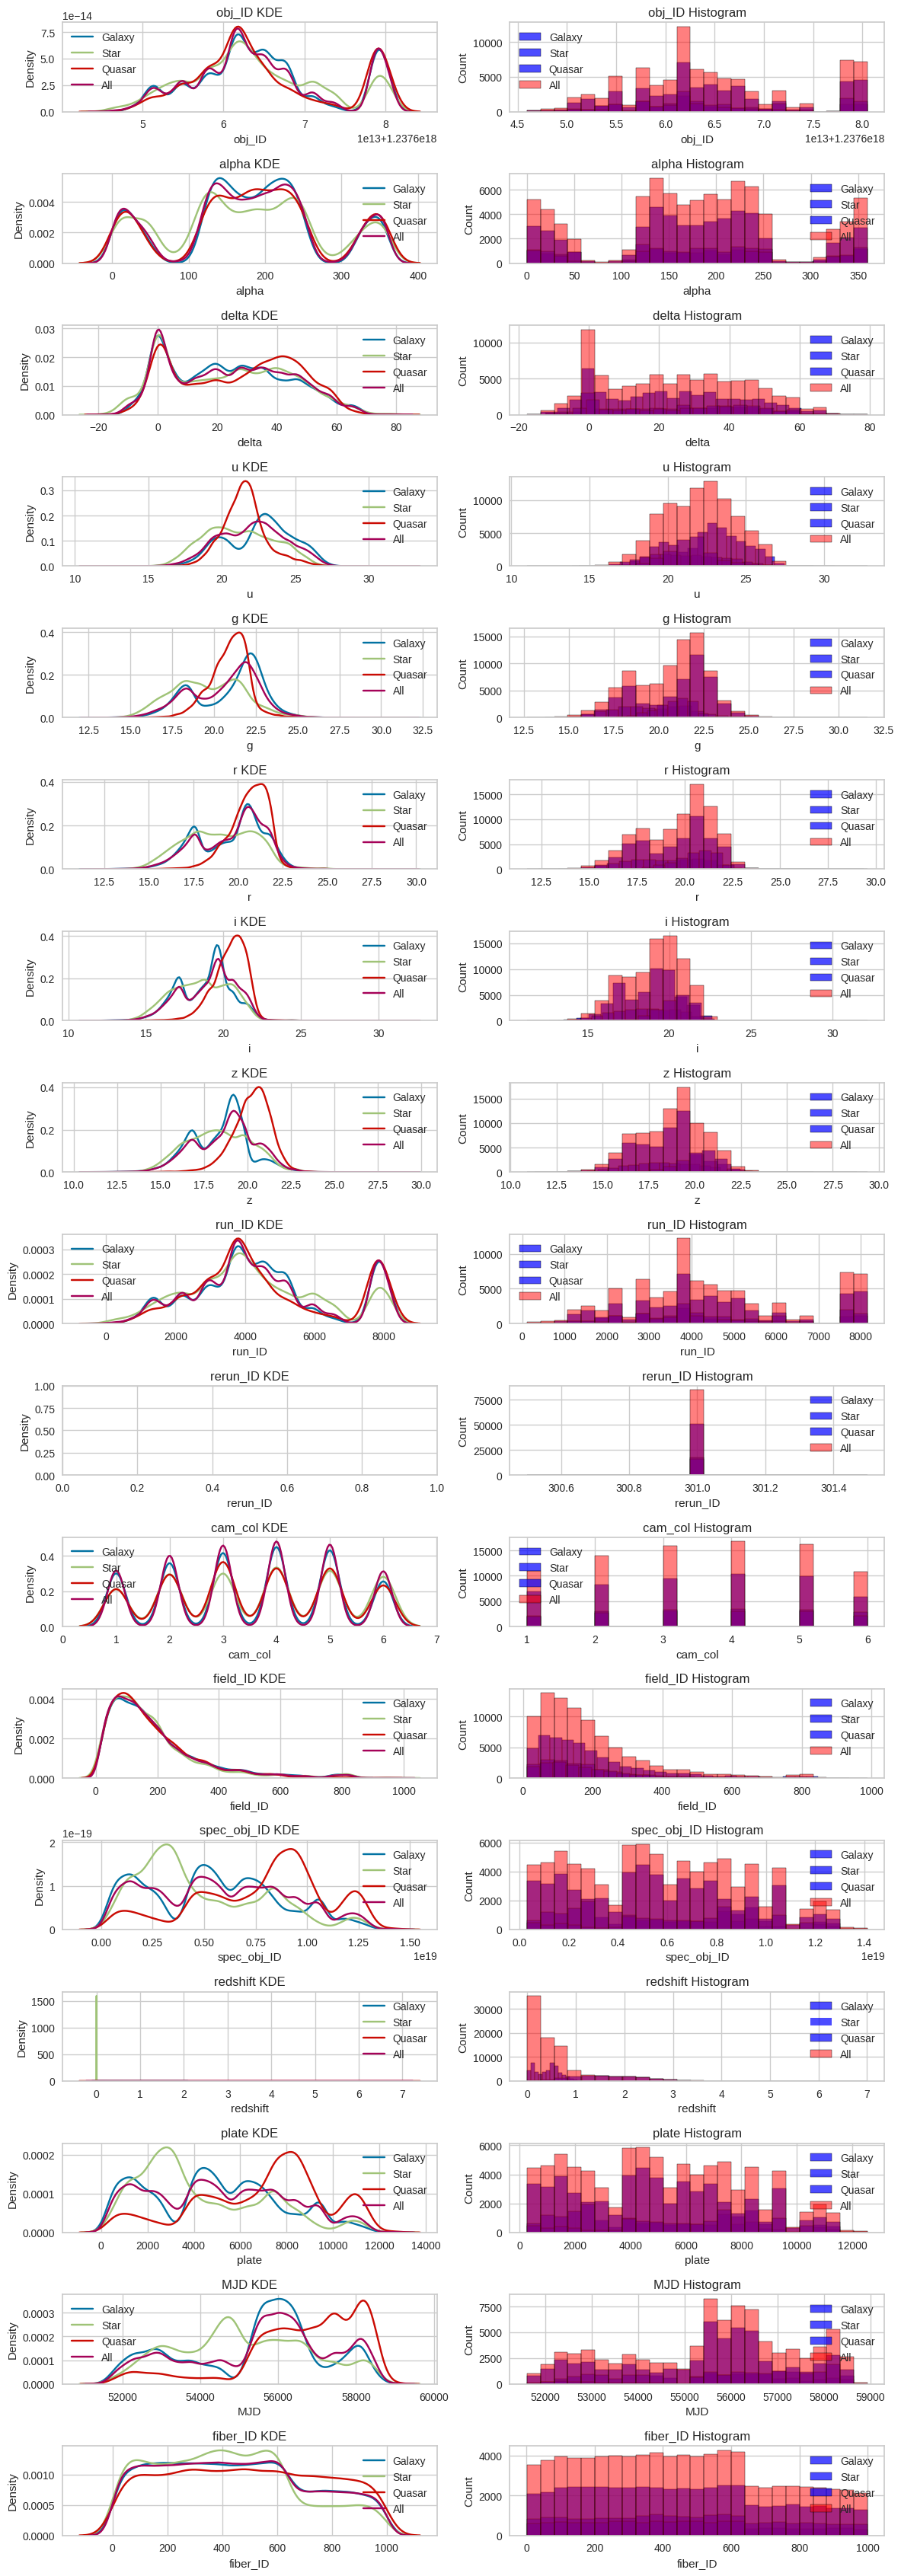

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppose you have a DataFrame named "df" and you have defined the "plot" and "log_plot" functions as you mentioned

# Select the features you want to visualize in the plots
features = df.drop('class', axis=1)

# Mapping of real labels to desired labels
label_mapping = {0: 'Galaxy', 1: 'Star', 2: 'Quasar'}

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(features.columns), ncols=2, figsize=(12, 2*len(features.columns)))
fig.subplots_adjust(hspace=0.5)

# Iterate through the features and generate plots
for i, col in enumerate(features.columns):
    # KDE Plot
    ax1 = axes[i, 0]
    for label_value, label_name in label_mapping.items():
        sns.kdeplot(data=df[df["class"] == label_value][col], label=label_name, ax=ax1)
    sns.kdeplot(data=df[col], label="All", ax=ax1)
    ax1.set_title(f'{col} KDE')
    ax1.legend()

    # Histogram Plot
    ax2 = axes[i, 1]
    for label_value, label_name in label_mapping.items():
        sns.histplot(data=df[df["class"] == label_value][col], bins=25, color='blue', alpha=0.7, ax=ax2, label=label_name)
    sns.histplot(data=df[col], bins=25, color='red', alpha=0.5, ax=ax2, label="All")
    ax2.set_title(f'{col} Histogram')
    ax2.legend()

plt.tight_layout()
plt.show()


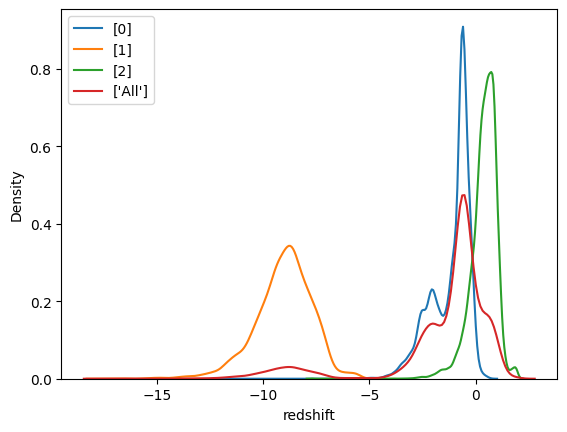

In [ ]:
log_plot("redshift")

<Axes: >

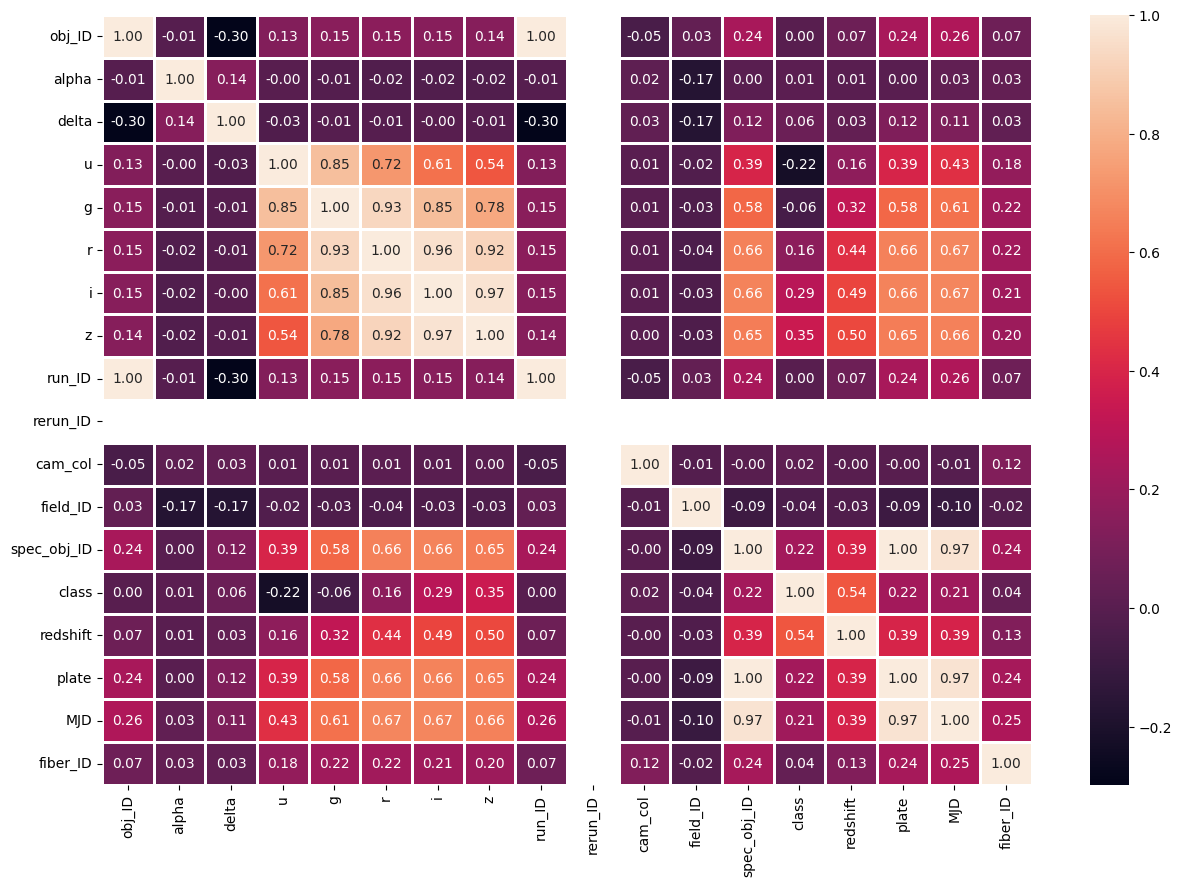

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

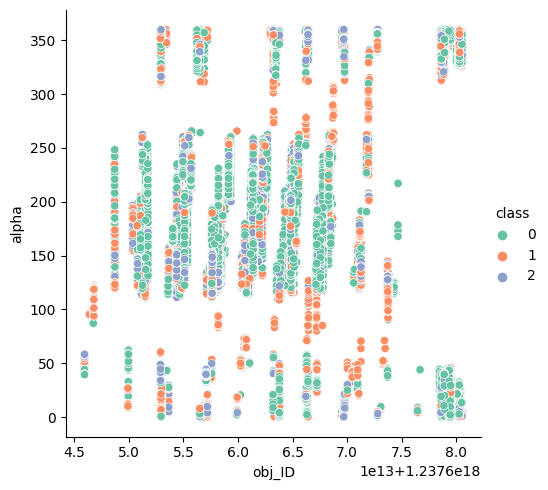

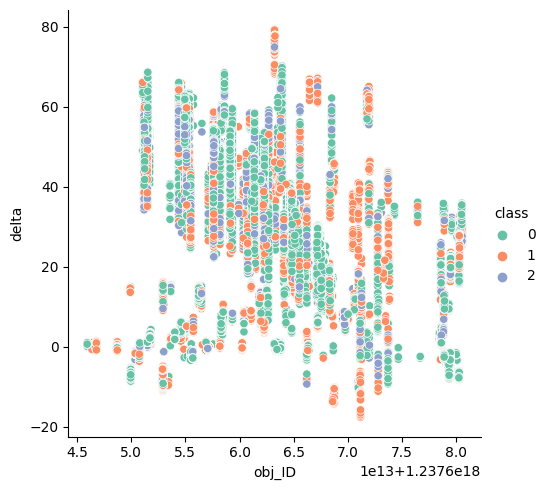

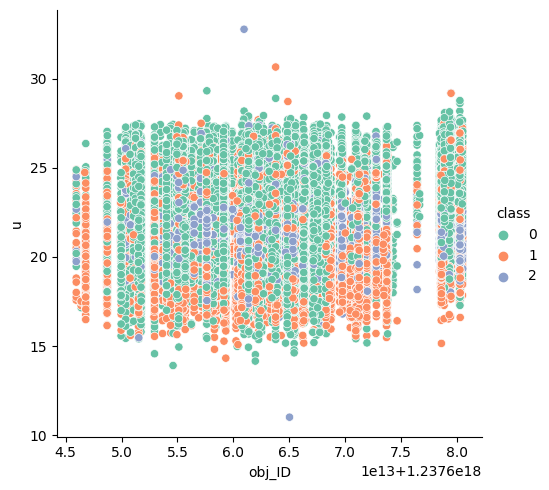

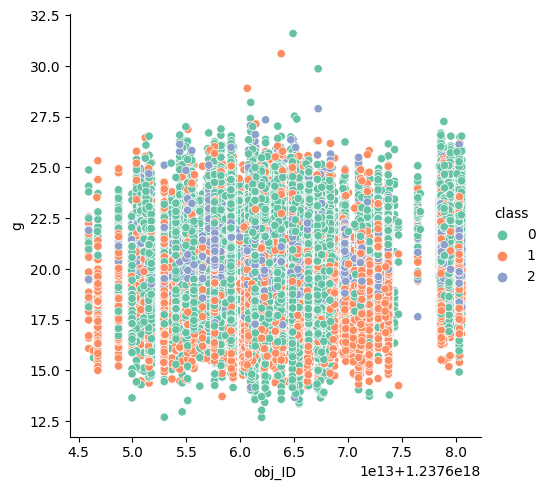

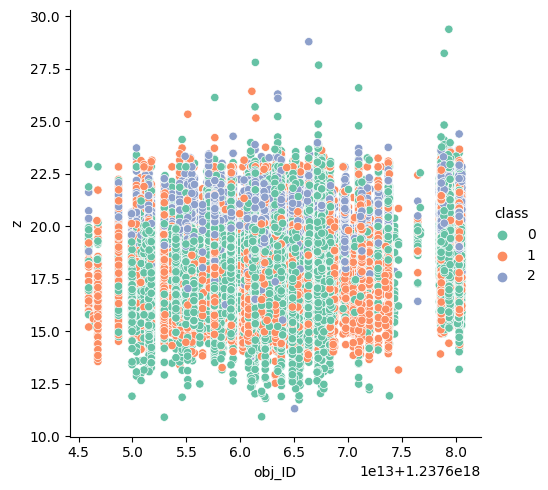

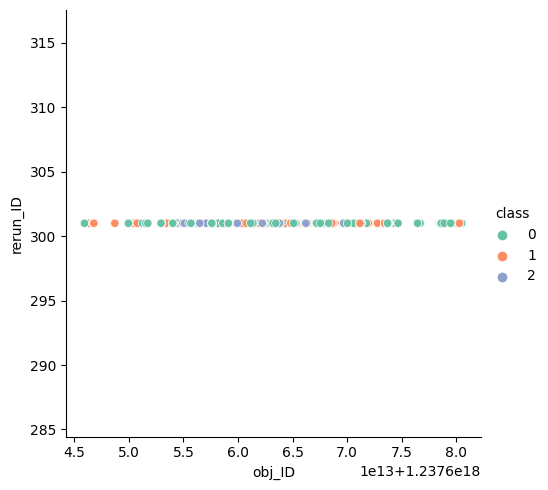

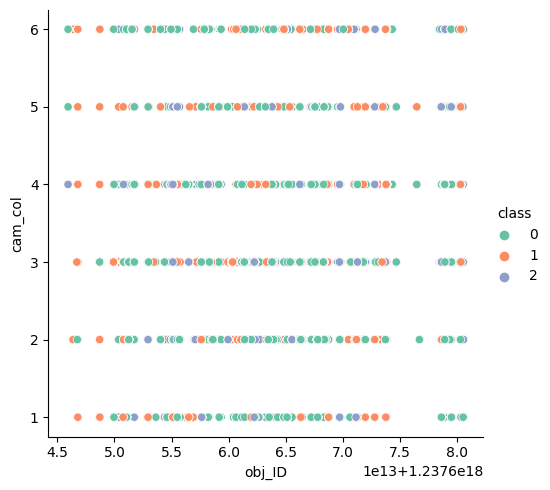

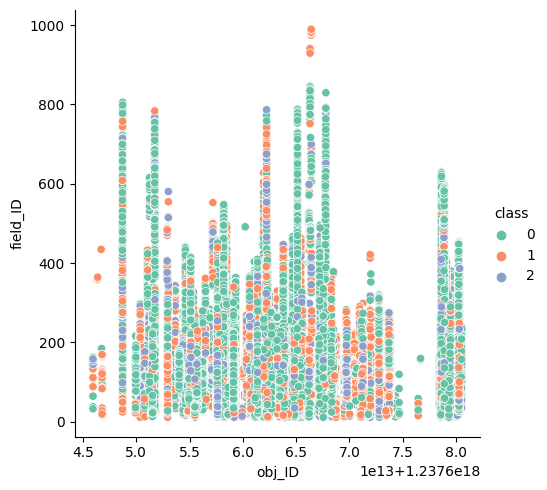

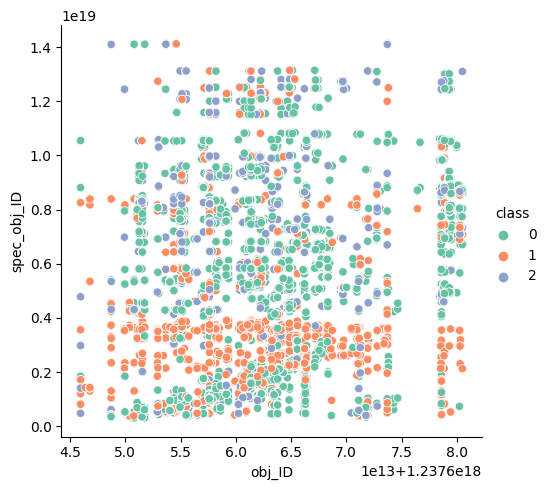

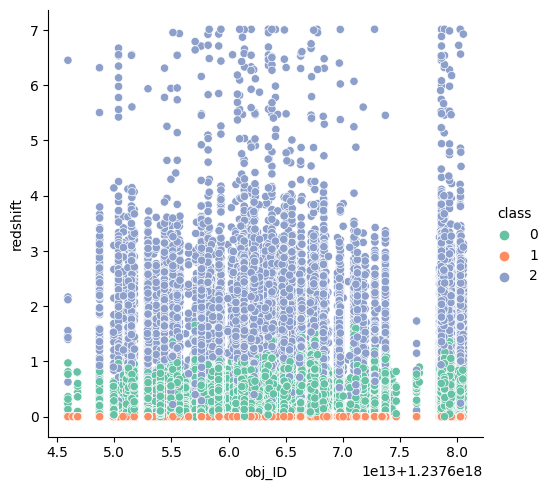

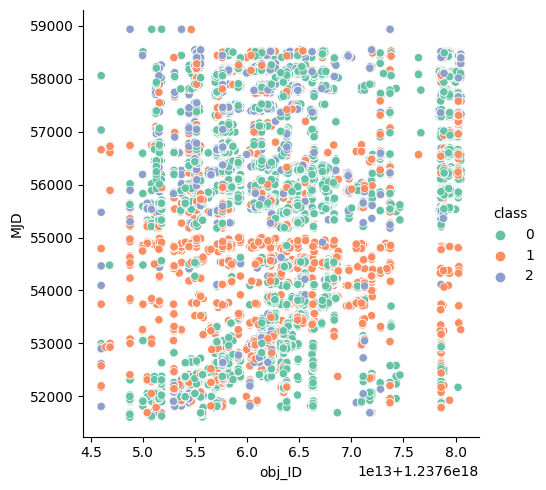

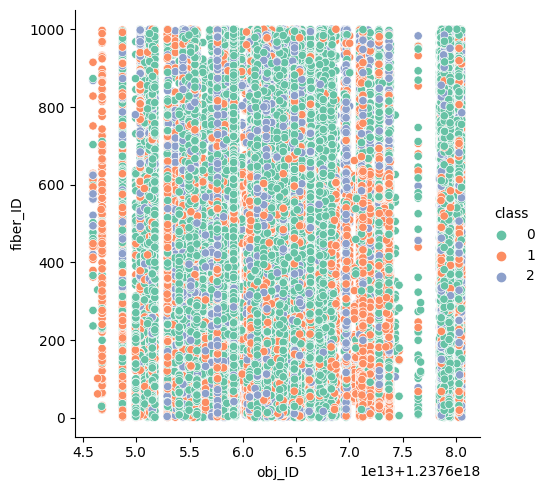

In [ ]:
custom_palette = sns.color_palette("Set2")

plots = []
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
          'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
          'plate', 'MJD', 'fiber_ID']:
    g = sns.relplot(data=df, x='obj_ID', y=i, hue='class', palette=custom_palette)
    plots.append(g)

plt.show()

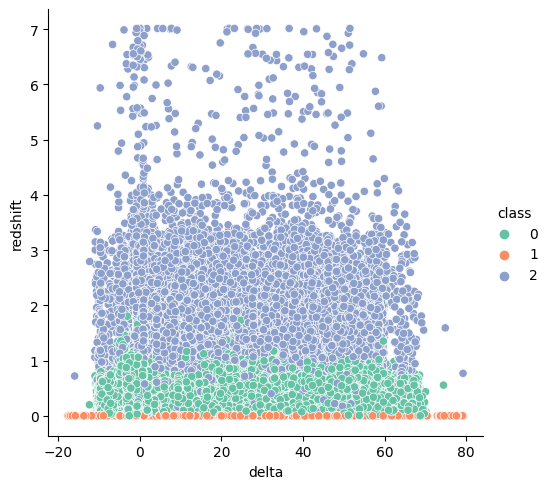

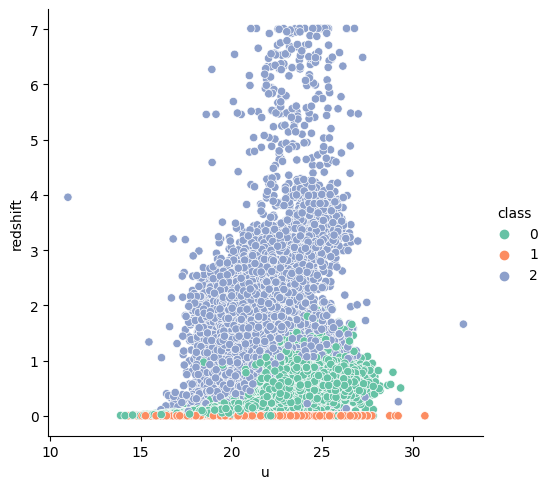

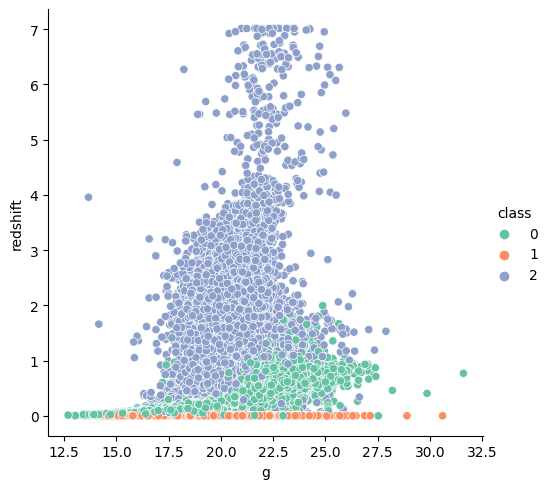

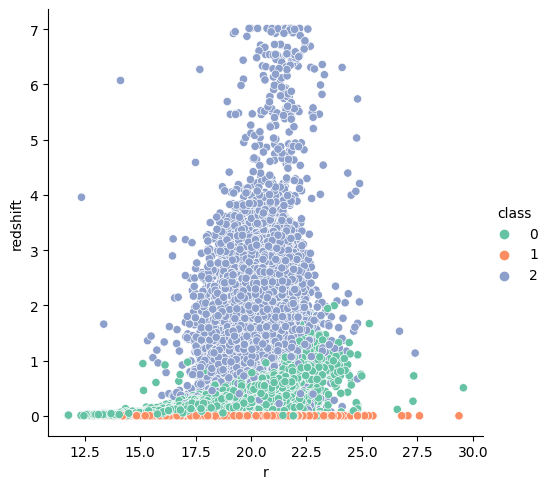

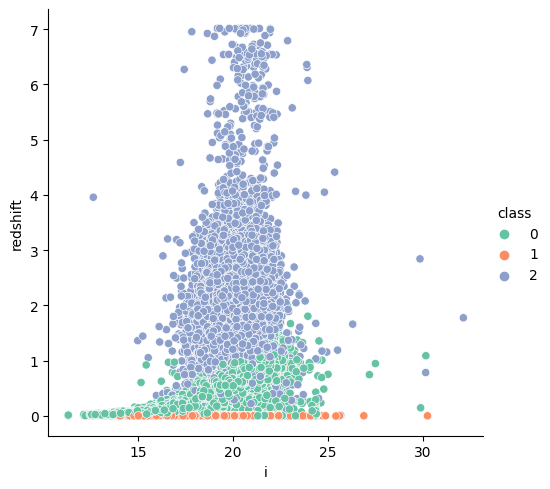

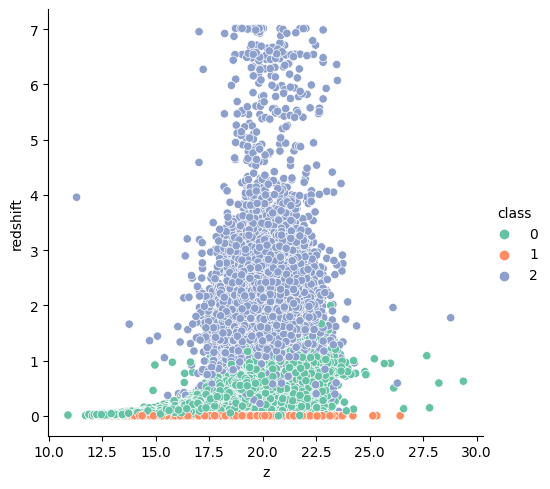

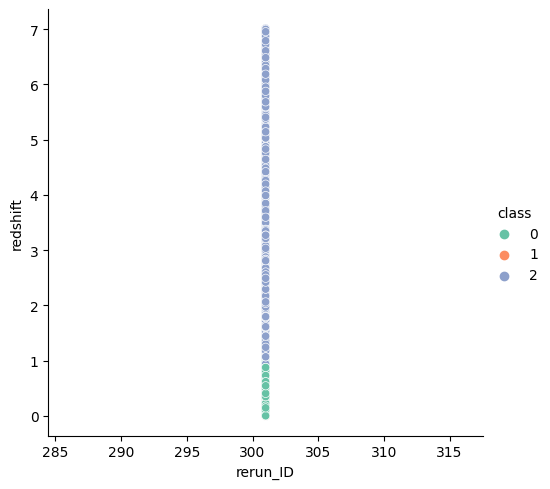

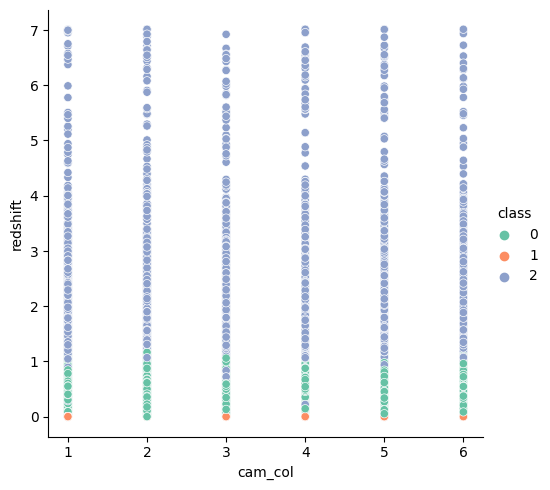

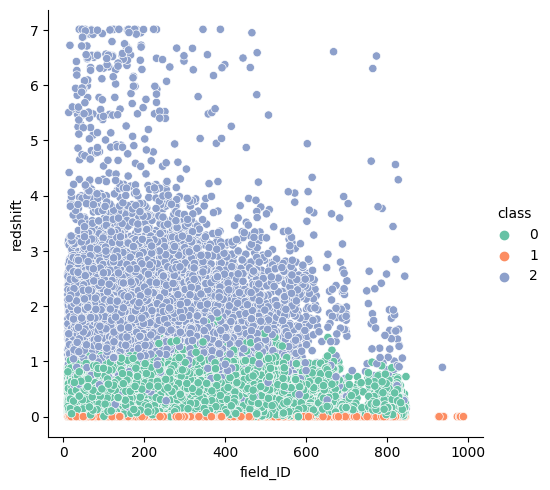

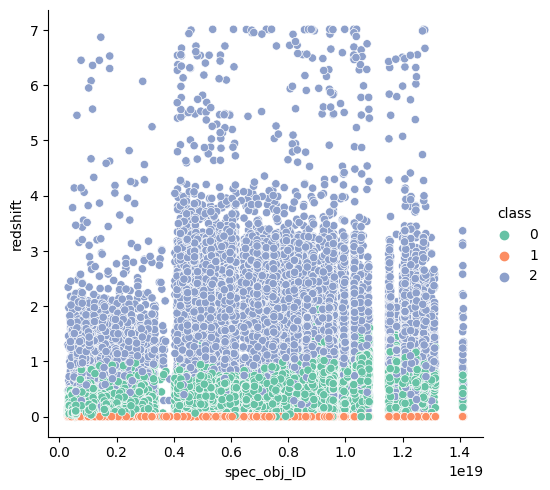

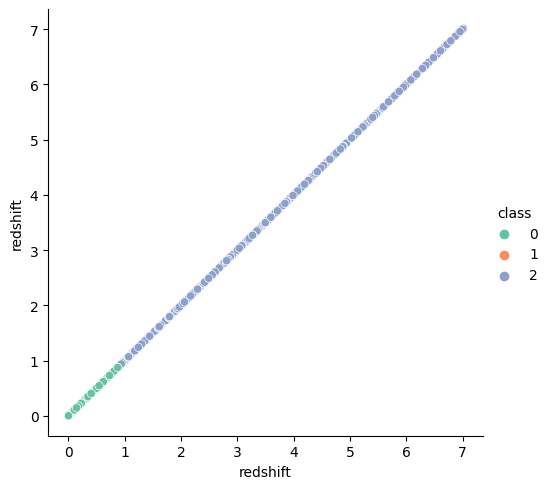

In [ ]:

#since the 'redshift' is the most significant while classifying the data
#we will see the variations in other attributes with 'redshift'
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
          'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
          'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x=i, y='redshift', hue='class', palette=custom_palette)
    plots.append(g);
#these plots show distribution of data points wrt to the redshift, and helps us identify the irrelevent attributes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid for the subplots
grid = sns.FacetGrid(data=df, col="class", hue="class", palette=custom_palette)

# Define the attributes you want to plot
attributes = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
              'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
              'plate', 'MJD', 'fiber_ID']

# Use a loop to plot the data
grid.map(sns.scatterplot, 'redshift', attributes)

# Customize the titles
grid.set_titles(col_template="{col_name}")

# Show the grid of subplots
plt.show()


In [ ]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)
df.shape

(84744, 10)

In [ ]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
6  1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   
6  20.60826  20.42573    7773       301        2       462  1.246262e+19   

   class  redshift  plate    MJD  fiber_ID  
0      0  0.634794   5812  56354       171  
1      0  0.779136  10445  58158       427  
3      0  0.932346   9149  58039       775  
4      0  0.116123   6121  56187       842  
6      2  0.586455  11069  58456       113

<Axes: xlabel='class', ylabel='count'>

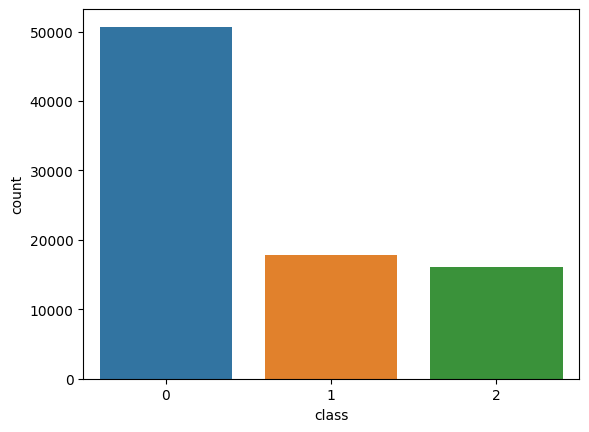

In [ ]:
sns.countplot(x='class',data=df)

In [ ]:
smote = SMOTE(random_state=42)

X = df.drop('class', axis=1)
y = df['class']

X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

Cuentas de valores de y después de SMOTE:
0    50695
2    50695
1    50695
Name: class, dtype: int64


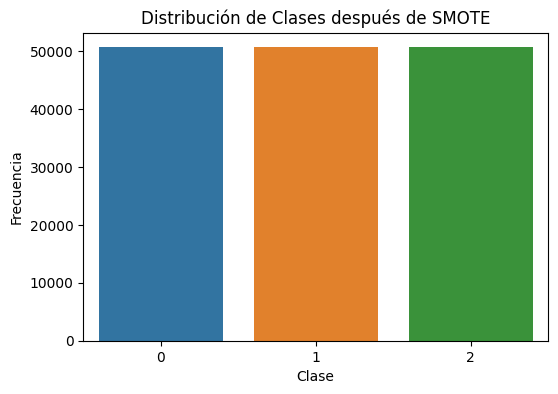

In [ ]:


# Crear un DataFrame con las etiquetas resampleadas
y_resampled_df = pd.DataFrame({'class': y_resampled})

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=y_resampled_df)
plt.title("Distribución de Clases después de SMOTE")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
X = X_resampled[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']]

In [ ]:
X.shape

(152085, 7)

In [ ]:
df=X.copy()

scaler=MinMaxScaler()
for i in ['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']:
    df[i]=scaler.fit_transform(df[[i]])

In [ ]:
df.head()

u         g         r         i         z  redshift     plate
0  0.591347  0.507117  0.485176  0.377421  0.427144  0.091831  0.451592
1  0.632603  0.536529  0.608004  0.473496  0.579719  0.112389  0.828841
2  0.511384  0.586451  0.553428  0.441657  0.451832  0.134210  0.723312
3  0.387463  0.259008  0.266523  0.224430  0.251387  0.017959  0.476753
4  0.480763  0.449037  0.515093  0.446634  0.515426  0.084946  0.879651

**models**

In [ ]:
classes = ['GALAXY','STAR','QSO']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_resampled, test_size=0.3, random_state = 42)

In [ ]:
score_df = pd.DataFrame(columns=['Algorithm', 'Recall score'])

In [ ]:
from sklearn.linear_model import LogisticRegression


#Logisitic regres
modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train, y_train)
y_pred1 = modelLR.predict(X_test)

from sklearn.metrics import recall_score
LR_score = recall_score(y_test, y_pred1, average='weighted')
print(LR_score)

0.9381931354929207


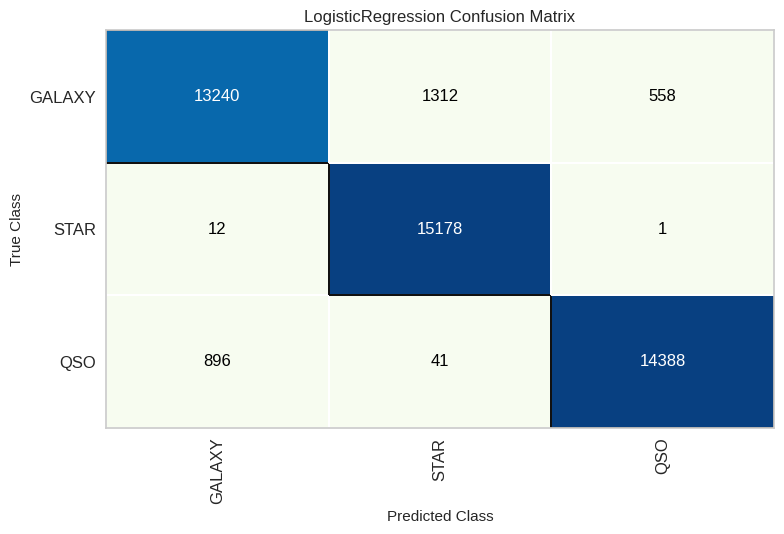

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
lg_cm = ConfusionMatrix(modelLR, classes=classes, cmap='GnBu')

lg_cm.fit(X_train, y_train)
lg_cm.score(X_test, y_test)
lg_cm.show()

knn

In [ ]:
modelknn = KNeighborsClassifier(n_neighbors = 1)
modelknn.fit(X_train, y_train)
y_pred2 = modelknn.predict(X_test)

knn_score = recall_score(y_test, y_pred2, average='weighted')
print(knn_score)

0.9627624600008767


In [ ]:
knn_cm = ConfusionMatrix(modelknn, classes=classes, cmap='GnBu')

knn_cm.fit(X_train, y_train)
knn_cm.score(X_test, y_test)
knn_cm.show()

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(random_state = 30)
modelDT.fit(X_train, y_train)
y_pred3 = modelDT.predict(X_test)

dtree_score = recall_score(y_test, y_pred3, average='weighted')
print(dtree_score)

0.9702801034497874


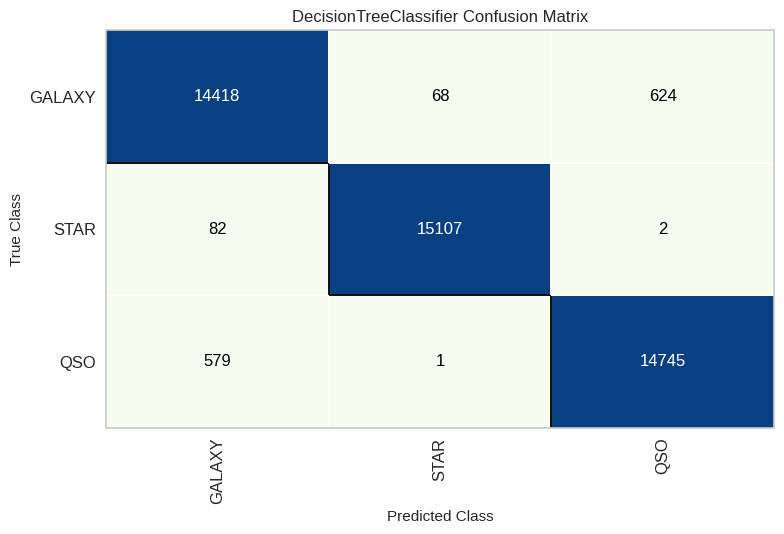

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
DT_cm = ConfusionMatrix(modelDT, classes=classes, cmap='GnBu')

DT_cm.fit(X_train, y_train)
DT_cm.score(X_test, y_test)
DT_cm.show()

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)
y_pred4 = modelNB.predict(X_test)

gnb_score = recall_score(y_test, y_pred4, average = 'weighted')
gnb_score


0.9233989392013325

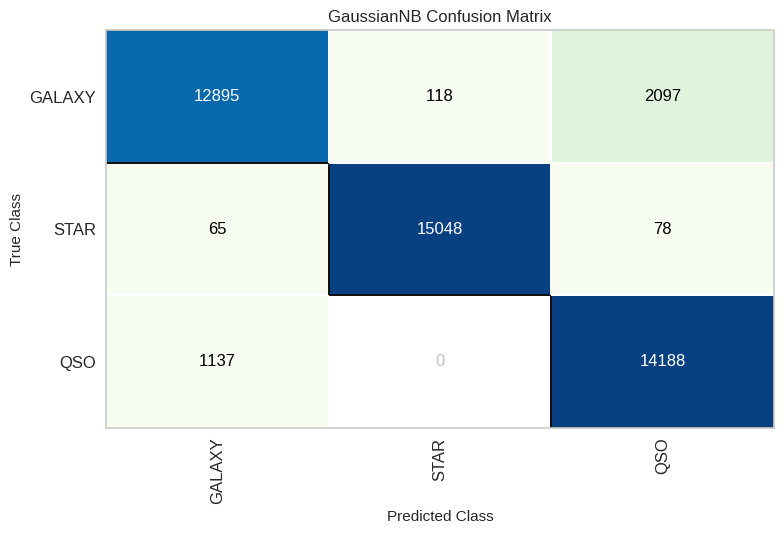

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
NB_cm = ConfusionMatrix(modelNB, classes=classes, cmap='GnBu')

NB_cm.fit(X_train, y_train)
NB_cm.score(X_test, y_test)
NB_cm.show()

RANDOM FOREST

In [ ]:
# Random Forest algo for n_estimators = 1

# despues de probar con varios n_estumators 5, 15, (o no poner) el mejor es 19con 0.9813
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators = 19, random_state = 30)
modelRF.fit(X_train, y_train)
y_pred5 = modelRF.predict(X_test)

from sklearn.metrics import recall_score
rf_score = recall_score(y_test, y_pred5, average = 'weighted')
rf_score

0.9813483540086793

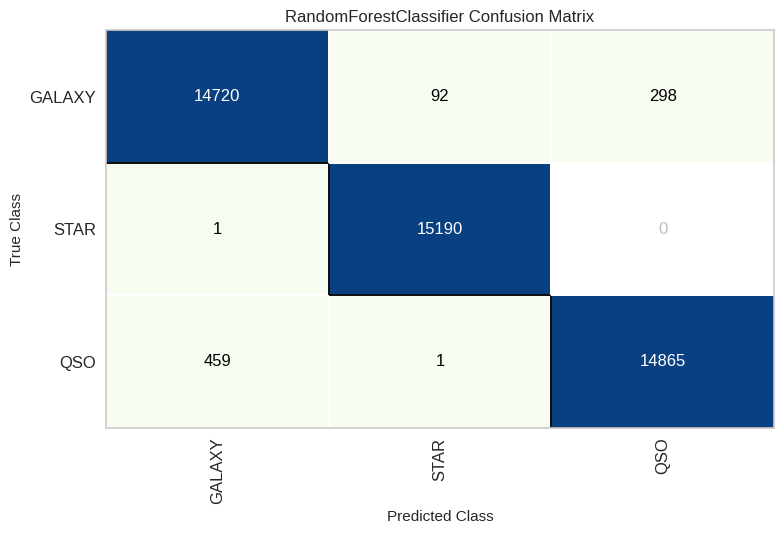

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
RF_cm = ConfusionMatrix(modelRF, classes=classes, cmap='GnBu')

RF_cm.fit(X_train, y_train)
RF_cm.score(X_test, y_test)
RF_cm.show()

# XGBoost

In [ ]:
import xgboost as xgb
modelXG = xgb.XGBClassifier(random_state = 42)
modelXG.fit(X_train, y_train)
y_pred6 = modelXG.predict(X_test)

from sklearn.metrics import recall_score
xgb_score = recall_score(y_test, y_pred6, average = 'weighted')
xgb_score

0.9819182045325034

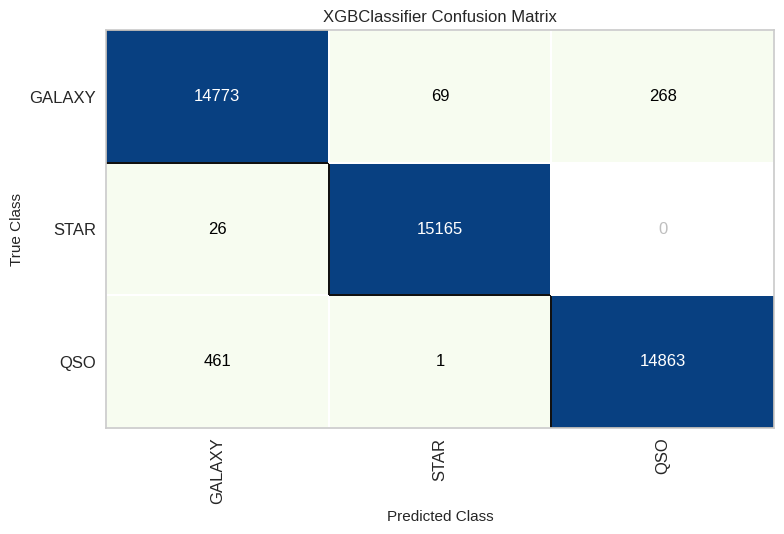

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
XG_cm = ConfusionMatrix(modelXG, classes=classes, cmap='GnBu')

XG_cm.fit(X_train, y_train)
XG_cm.score(X_test, y_test)
XG_cm.show()